[ 0.24677636 -0.36874416 -0.01414203 -0.37124578  0.22880639 -0.11762747
 -0.01112486 -0.10611603  0.          0.          0.          0.        ]


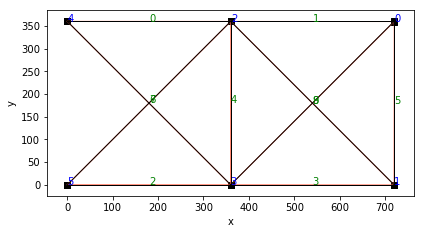

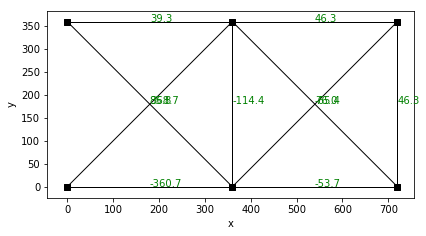

In [1]:
# import module
# visualize 10-bar truss

from sapy import displmethod
from sapy import element
from sapy import gmsh
from sapy import structure
from sapy import plotter
from matplotlib import pyplot as plt
import numpy as np

mesh_file = 'geo/truss_10'

bound = {4: [1, 1], 5: [1, 1]}

nodal_load = {1: [0., -100.],
             3: [0., -100.]}

ele = element.Data()
for i in range(10):
    area = np.random.uniform(0.1, 35.0) * 35 # in2
    ele.E[i] = 10000.
    ele.A[i] = area
    ele.TYPE[i] = 'Truss'
    
mesh = gmsh.Parse(mesh_file)
model = structure.Builder(mesh, ele, bound)
U, Q = displmethod.solver(mesh, model, ele, nodal_load)
print(U)
plotter.deformed(model, U)
plotter.axialforce(model, Q)
plt.show()
